# Return on Investment


let's get started where I think most investors probably want to start, and that is by looking at returns. What exactly is a return, and how do we characterize returns? So what we're going to do is really try to understand how do we characterize returns. So let's start at the basics, which is, how do you compute the return? The return on asset is simply as sort of the profit you make if you had bought an asset over a period of time. 

Remember that what we're going to try and do here is we're going to be just working with some very basic concepts of returns and how to compute a return from prices and how to go from a multi-period return to a compounded return and then finally, how to analyze return.

Recall that the return from time $t$ to time ${t+1}$ is given by the following equation:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$  
$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

For example i you buy a stock at 10 and sell it at 12 then your return will be 20%



$$ R_{t,t+1} = \frac{12-10}{10}  =   0.2 $$

However in the case of stocks, we might need to take dividends into consideration. Most stock market index portfolios will contain stocks that generate dividends from time to time. Therefore, total returns over a period will almost always exceed the price returns. In the case of fixed income securities then you might want to look at compound return as well.

For example here is a list of prices for General Motors stock "GM" over a period of 3 days. 

In [1]:
prices_GM = [8.70, 8.91, 8.71]

Price on day 1 shows 2.4% increase

In [2]:
(8.91/8.70)-1 

0.024137931034482918

Price on day 2 shows 2.2% drop

In [3]:
(8.71/8.91)-1 

-0.022446689113355678

However in the case of GM we've got a sequence of prices that's given here as a Python list and since prices a is a list, therefore it's a sequence, we should be able to use the sequence to generate a sequence of returns. Let's create a `numpy` array which is similar to a list. In order to do so we will have to import the `numpy` package.

In [2]:
import numpy as np

prices_GM = np.array([8.70, 8.91, 8.71])
prices_GM

array([8.7 , 8.91, 8.71])

Well, if you remember how to do slicing in Python perhaps you can recall, the following code. If you haven't seen this before, this colon there tells you that you're trying to get a slice of the list. It says start from the Index 1 all the way until the end.

In [3]:
prices_GM[1:]

array([8.91, 8.71])

All the way from the beginning except the last price.

In [4]:
prices_GM[:-1]

array([8.7 , 8.91])

So you want everything from the first element onwards, from the element at Index 1 onwards. So that's that 8.91, and then you want to divide that by the sequence of prices for everything except the last one to get the series of returns.

In [5]:
prices_GM[1:]/prices_GM[:-1] - 1

array([ 0.02413793, -0.02244669])

Now, let's add a few more days of prices and introduce a second stock. Let's call these two stocks "GM" and "FORD". Instead of using raw numpy arrays, we are going to use the far more powerful Pandas DataFrame, which wraps the functionality of numpy into a very convenient and easy to use data structure called a DataFrame. Note how the DataFrame has two nicely indexed columns as well as a row index that by default runs from 0 to 4.

In [4]:
import pandas as pd

prices = pd.DataFrame({"GM"  : [8.70 , 8.91 , 8.71 , 8.43 , 8.73 ],
                       "FORD": [10.66, 11.08, 10.71, 11.59, 12.11]})

In [5]:
prices

,GM,FORD
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


Just like we did before, we should be able to divide everything except the first row by everything except the last row. If you look at this, that's essentially what it's doing. Everything except the first price, and everything except the last price. 

Now, the way you do this in a Pandas DataFrame is by using this syntax called iloc. Think of it as index location. So what does iloc do? If you want all of the prices except the first one or everything except the last one you should follow the following syntax.

```python
prices.iloc[1:]       prices.iloc[:-1]
```

In [8]:
prices.iloc[:]

,GM,FORD
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


You want prices iloc, that's the first one.

In [9]:
prices.iloc[1:]

,GM,FORD
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


Then, what do you want to divide it by prices.iloc

In [10]:
prices.iloc[:-1]

,GM,FORD
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


First, we need to extract the values of the DataFrame column which returns a numpy array, so that the DataFrame does not try and align the rows as this syntax will not work.
```python 
prices.iloc[1:] / prices.iloc[:-1] - 1  

	 GM	 FORD
0	NaN	NaN
1	0.0	0.0
2	0.0	0.0
3	0.0	0.0
4	NaN	NaN

```
Therefore, instead of treating it as a DataFrame, there's a method called values. What values does is it takes a DataFrame and it just pulls the values out and gives you back that NumPy array that we had before. It's actually a NumPy matrix but it's just pure NumPy without this index stuff in there. If you're dividing just basic NumPy matrix without any row index information, then it doesn't have anything to align by and so it'll do just pure positional division. 

In [11]:
prices.iloc[1:] / prices.iloc[:-1] - 1

,GM,FORD
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


In [12]:
prices.iloc[1:].values/prices.iloc[:-1].values - 1

array([[ 0.02413793,  0.03939962],
       [-0.02244669, -0.0333935 ],
       [-0.03214696,  0.0821662 ],
       [ 0.03558719,  0.04486626]])

In order to preserve the DataFrame we will only convert only the numerator or the denominator to a NumPy array, doing both will convert the DataFrame to an array which we do not want.

In [13]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,GM,FORD
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


You could have also used the values in the denominator:

In [14]:
prices.iloc[1:]/prices.iloc[:-1].values - 1

,GM,FORD
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


However, there are a couple of ways to do this without extracting the values, and these are probably a bit cleaner and more readable. The first option is to use the `.shift()` method on the array, which realigns the indices.

In [15]:
prices

,GM,FORD
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


Since we want to get the row at index 0 (8.70 and 10.66) to line up with the row at index 1 (8.91 and 11.08) so we can divide the 2nd row (at index 1) by the first row (at index 0) we want to shift the rows in the denominator by 1 ... which we do with `.shift(1)`

In [16]:
prices.shift(1)

,GM,FORD
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


For example, you could just say prices divided by prices shifted by one.
So, now we can obtain the returns on each day as follows:

In [17]:
returns = prices/prices.shift(1) - 1
returns

,GM,FORD
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


Note how we cannot compute returns for the first day, because we dont have the closing price for the previous day. In general, we lose one data point when we go from prices to returns.

Finally, there is a built-in method in DataFrame that computes the percent change from one row to another. Since that is exactly what a return is (the percent change in price) we can just use this method to compute the return.


In [18]:
returns = prices.pct_change()
returns

,GM,FORD
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


#### Reading data from a CSV file
Since typing in returns is tedious, let's load or read the data in from a csv file. Pandas provides a convenient and simple way to load CSV files into DataFrames. Make sure that the excel file is in the same location where Python code is stored otherwise you will need to give it the file path.

In [19]:
prices = pd.read_csv('sample_prices.csv')
prices

,GM,FORD
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [20]:
returns = prices.pct_change()
returns

,GM,FORD
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


We can compute the mean of the series by doing returns.mean()

In [21]:
returns.mean()

GM      0.01
FORD    0.01
dtype: float64

We can compute the standard deviation of the series by doing returns.std

In [22]:
returns.std()

GM      0.023977
FORD    0.079601
dtype: float64

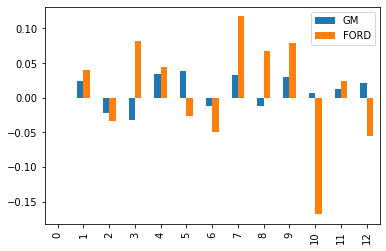

In [23]:
returns.plot.bar()

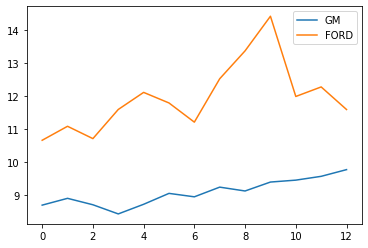

In [24]:
prices.plot()

#### Compounding Returns

Now that we have a series of 12 monthly returns, we can produce the compounded return by multiplying the individual period returns, as long as the returns are expressed as growth rates in what I call "1+R" format.

To compound the returns, all we need to do is add 1 to each return and then multiply them. The result is itself in "1+R" format, so we need to subtract 1.

Let's compute the compounded return of our two series. 

In [25]:
returns + 1

,GM,FORD
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


Now we need to multiply each of these in sequence, There's a couple different ways that we can do it. The first way is to use the NumPy prod method. That will take returns, add one to it, and then it'll multiply each column and give you the result of multiplying each column. You'll see that GM column is 1.12 and the FORD column is 1.08.

In [26]:
np.prod(returns+1)

GM      1.123310
FORD    1.087167
dtype: float64

There's another way you could do this. You can do returns plus one. Remember, returns plus one is itself a DataFrame. So what you can do is call the.prod method on that DataFrame and you can take one away from that resulting DataFrame. You'll get exactly the same answer. 

In [27]:
(returns+1).prod()

GM      1.123310
FORD    1.087167
dtype: float64

In [28]:
(returns+1).prod()-1

GM      0.123310
FORD    0.087167
dtype: float64

In [29]:
(((returns+1).prod()-1)*100).round(2)

GM      12.33
FORD     8.72
dtype: float64

#### Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

For example, to annualize a 1% monthly, and 4% quarterly and a 0.01% daily return you would do:

In [30]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [31]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [32]:
rd = 0.0001
(1+rd)**252 - 1

0.025518911987694626